In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn                 import decomposition
from sklearn.decomposition   import PCA
from sklearn.preprocessing   import StandardScaler
from sklearn.cluster import KMeans

In [2]:
cc =pd.read_csv(r"C:\Users\Kalpesh\Downloads\164423199600560ec2379f8793842aa5b168a_\25 Machine Learning Question Paper 2 with datasets\25 Machine Learning Question Paper 2 with datasets\credit_card.csv")

In [3]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cc.shape

(8950, 18)

# Q1. Primary analysis of Categorical Features

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
cc.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

C:\Users\Kalpesh\AppData\Local\Temp\ipykernel_45736\915994883.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cc.corr(), dtype=np.bool))


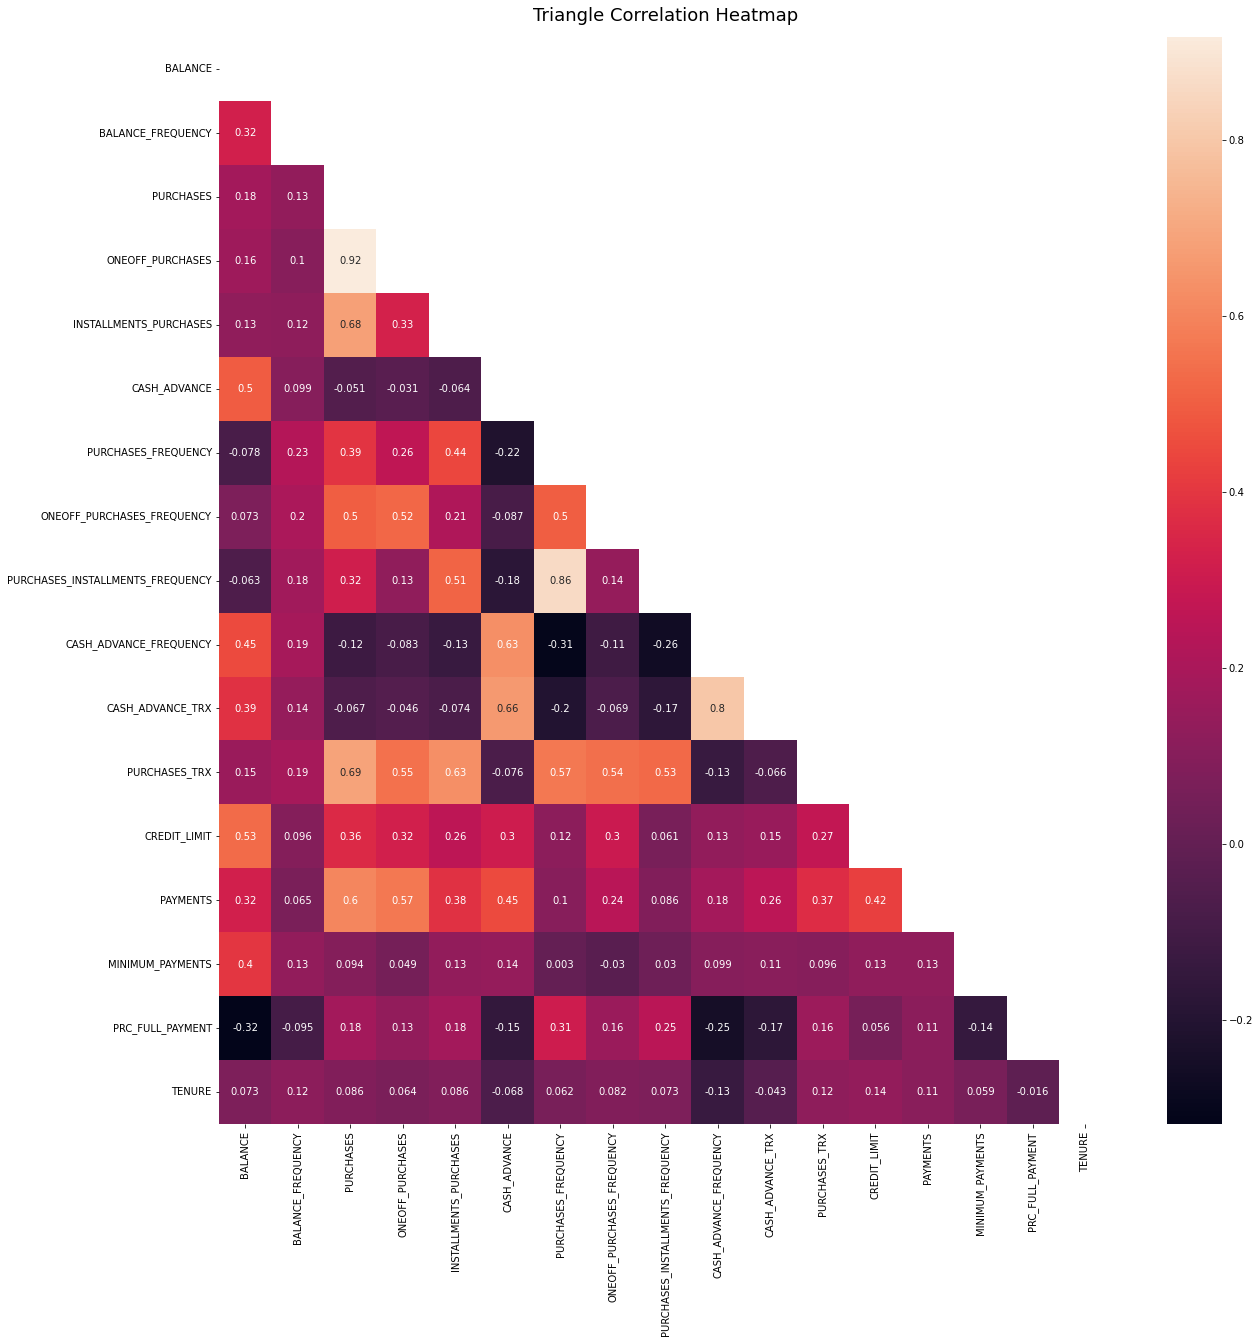

In [9]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(cc.corr(), dtype=np.bool))
heatmap = sns.heatmap(cc.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

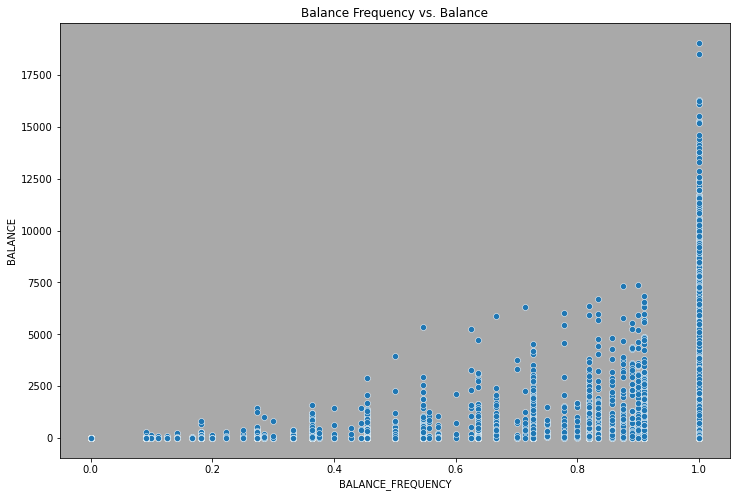

In [10]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='BALANCE_FREQUENCY', y='BALANCE', data=cc)
g.set_title('Balance Frequency vs. Balance')
plt.show()

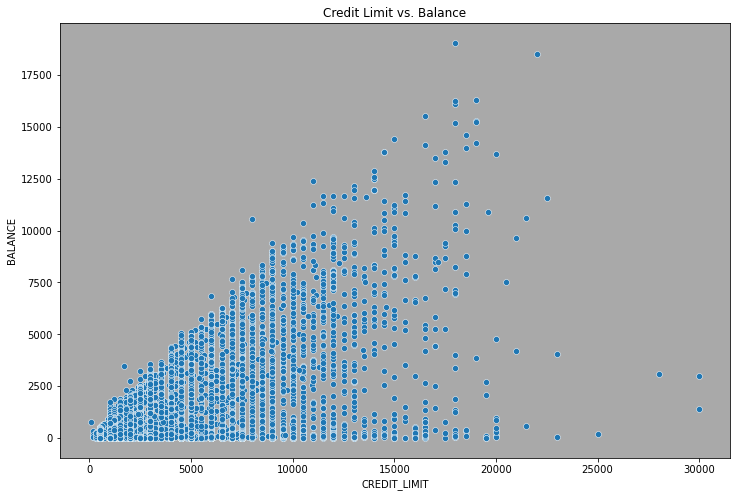

In [11]:
plt.figure(figsize=(12,8))
ax = plt.axes() 
ax.set_facecolor('darkgrey') 
g = sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=cc)
g.set_title('Credit Limit vs. Balance')
plt.show()

We can see some correlation between credit limit and balance, so those with a higher credit limit are generally spending more.

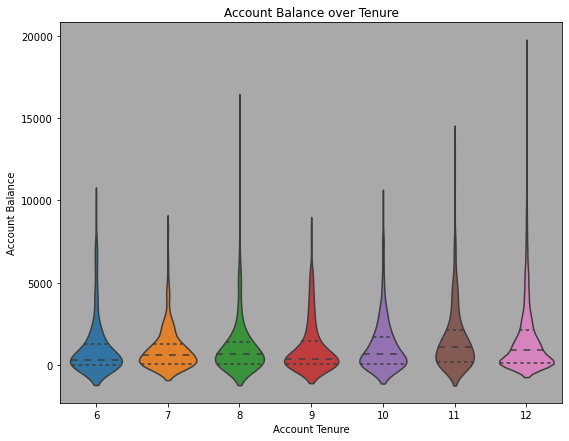

In [12]:
plt.figure(figsize=(9,7))
ax = plt.axes() 
ax.set_facecolor('darkgrey')
sns.violinplot(x='TENURE', y='BALANCE', data=cc, inner='quartile')
plt.xlabel('Account Tenure')
plt.ylabel('Account Balance')
plt.title('Account Balance over Tenure')
plt.show()

In [13]:
o_cols = cc.select_dtypes(include=['object']).columns.tolist()
num_cols = cc.select_dtypes(exclude=['object']).columns.tolist()

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

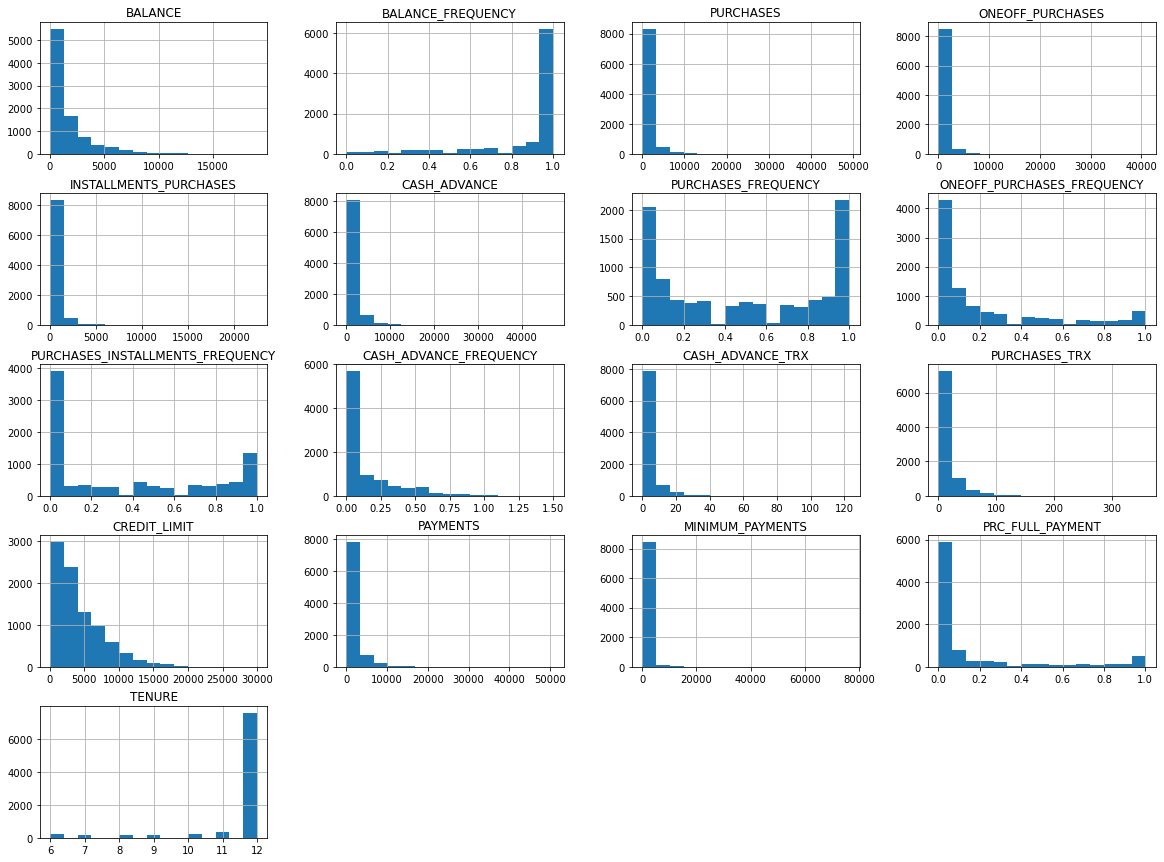

In [14]:
cc[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4))

<Figure size 864x720 with 0 Axes>

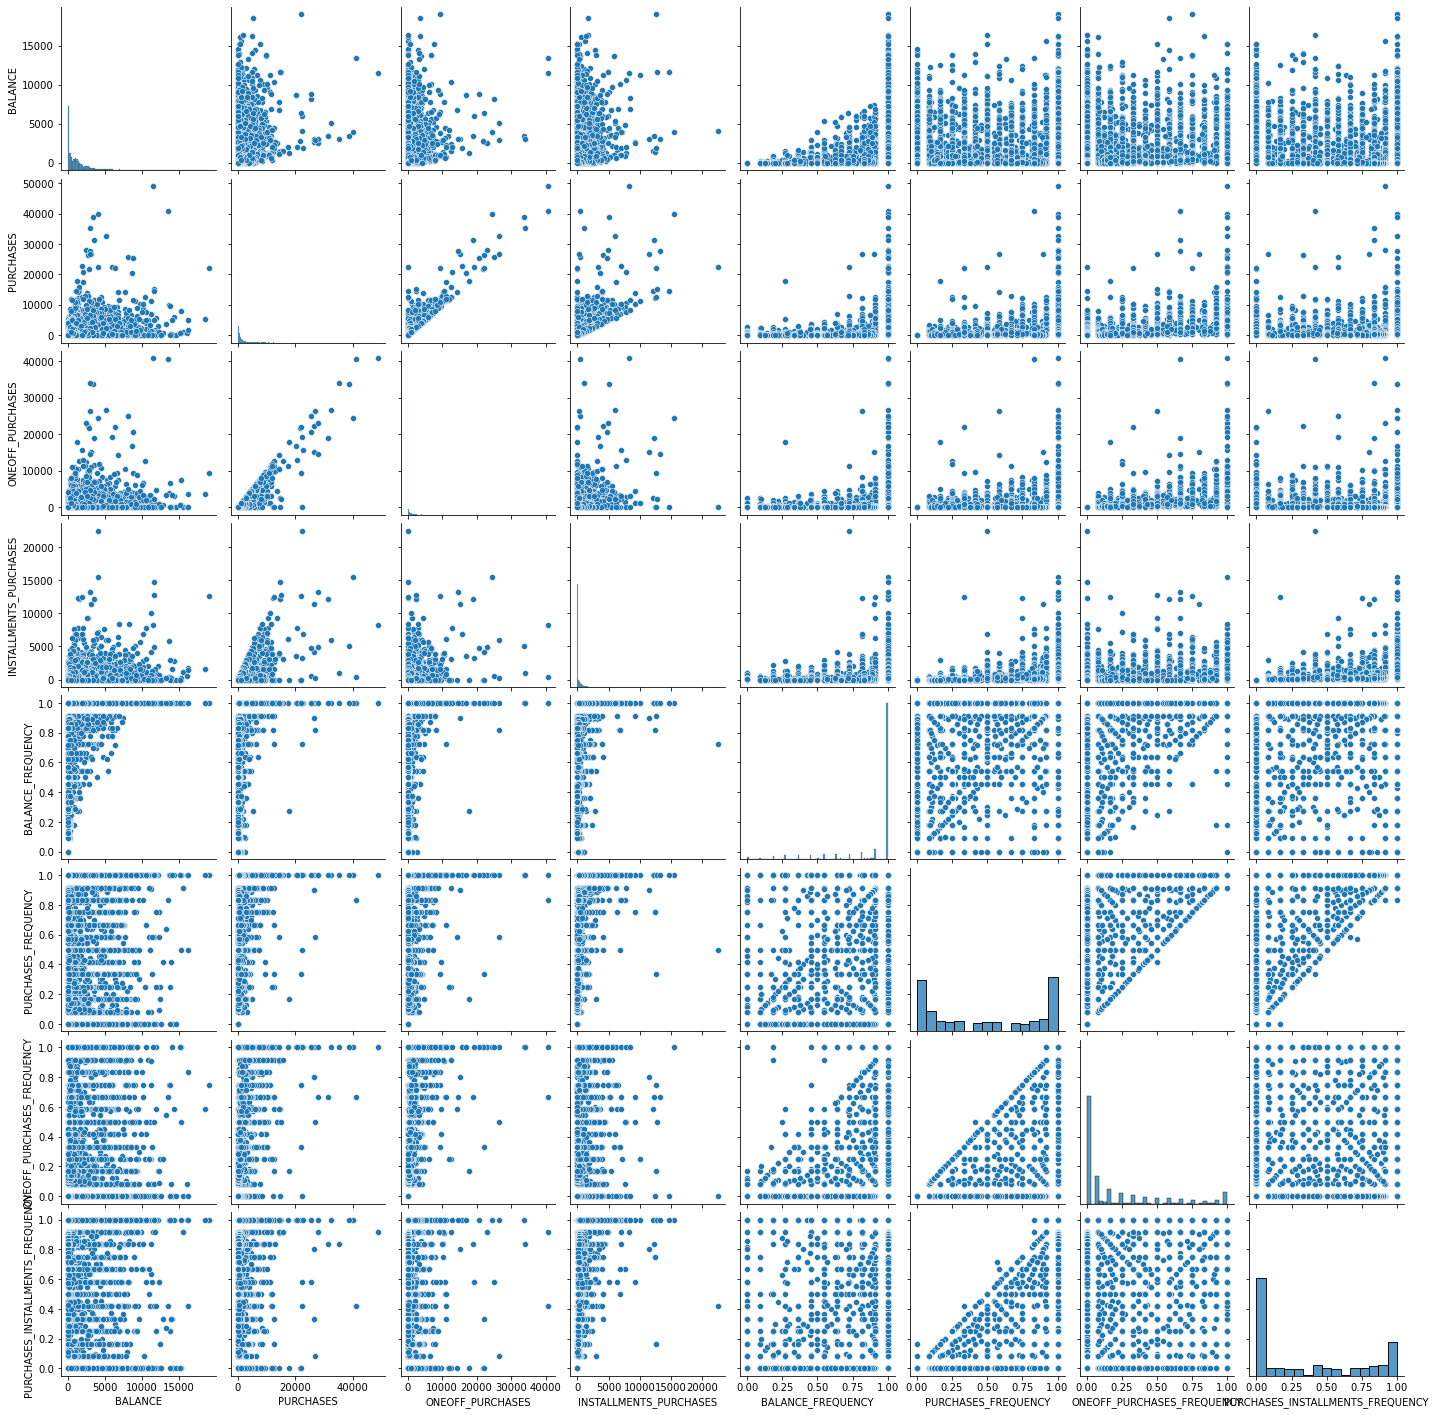

In [15]:
intr_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']

plt.figure(figsize=(12,10))
sns.pairplot(cc[intr_cols])
plt.show()

Purcahses and oneoff purchases are positively correlated. All the frequencies generally increase when other attributes increase as well.

# Exploratory Data Analysis

In [16]:
#cust_id is not needed for this analysis, so we can drop it here
#We know each record represents a card holder.


cc.drop(columns='CUST_ID', inplace=True)

In [17]:
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


A.Missing Value Analysis

In [18]:
cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
#I chose to drop the na values to maintain genuine data records, and the proportion of missing values
#is so small in virtually one column.

cc.dropna(axis='index', inplace=True)

In [20]:
cc.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

B.Outlier Treatment using the Z-score method

In [21]:
z_score = np.abs(stats.zscore(cc))
print(z_score)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
data_without_outlier = pd.DataFrame(cc[(z_score < 3).all(axis=1)], columns = cc.columns)

In [23]:
data_without_outlier.shape

(7190, 17)

C.Deal with correlated variables

In [24]:
cc.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


Here we can see in matrix is that all values are close to zero so the co relation between any two principal component is zero. so there is no plm of multicolinearity.

To make all data uniform and unitless here we will use Standerd Scaler.

In [25]:
scaler = StandardScaler()

In [26]:
scaled_cc = scaler.fit_transform(data_without_outlier)

In [27]:
scaled_cc

array([[-8.24858910e-01, -4.71097660e-01, -6.48316708e-01, ...,
        -5.73181773e-01, -5.36968393e-01,  3.10948899e-01],
       [ 1.23784994e+00,  1.56213208e-02, -7.40038008e-01, ...,
         6.03055217e-01,  2.26610186e-01,  3.10948899e-01],
       [ 7.76372328e-01,  5.02340302e-01,  3.31794409e-03, ...,
         4.18699869e-02, -5.36968393e-01,  3.10948899e-01],
       ...,
       [-2.84365854e-01, -8.36138235e-01, -7.40038008e-01, ...,
        -3.22915322e-01, -5.36968393e-01, -4.73298248e+00],
       [-7.61674641e-01,  5.02340302e-01, -3.16043318e-01, ...,
        -5.91931703e-01, -5.36968393e-01, -4.73298248e+00],
       [-6.35542971e-01, -8.36138235e-01, -6.61969144e-01, ...,
        -4.90520356e-01, -5.36968393e-01, -4.73298248e+00]])

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [28]:
pca_cc = PCA()

In [29]:
data_after_pca_transformation = pca_cc.fit_transform(scaled_cc)

In [30]:
pca_cc.explained_variance_ratio_

array([2.90928800e-01, 2.03112130e-01, 9.48753260e-02, 7.82343073e-02,
       6.32048840e-02, 5.36407638e-02, 4.62442758e-02, 3.77809414e-02,
       3.46662452e-02, 2.83634070e-02, 1.79740894e-02, 1.69735344e-02,
       1.37824370e-02, 1.15394618e-02, 6.38472040e-03, 2.29268606e-03,
       1.99078812e-06])

In [31]:
list(pca_cc.explained_variance_ratio_)

[0.290928799749176,
 0.20311212979217746,
 0.09487532603527896,
 0.07823430727866937,
 0.06320488403617804,
 0.053640763822511865,
 0.046244275795352445,
 0.037780941404806125,
 0.03466624519763338,
 0.02836340698118195,
 0.017974089373161462,
 0.016973534419534524,
 0.013782437037856267,
 0.011539461827549273,
 0.0063847203971916806,
 0.0022926860636201638,
 1.990788121072508e-06]

In [32]:
pca_cc.explained_variance_ratio_.sum()

1.0000000000000002

# Here sum of the value is 1. so we are on right track.

IN ANY MODEL THERE ALWAYS BE ERROR(AROUND 5 TO 10%)

WE CAN SELECT THOSE NUMBER OF PCAs WHICH ARE ABLE TO EXPLAIN AROUND 90 TO 95% OF THE VARIANCE.

AND WE CAN IGNORE REST OF THEM.

In [33]:
l1 = list(pca_cc.explained_variance_ratio_)

In [34]:
np.sum(l1[0:11])

0.9490251694661271

In [35]:
pca = PCA(n_components = 11) 
X_principal = pca.fit_transform(scaled_cc) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2' ,'P3', 'P4' , 'P5', 'P6' ,'P7', 'P8', 'P9', 'P10' , 'P11']
X_principal.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,-1.303382,-2.126307,0.276408,-0.598291,-0.024294,-0.278706,0.701748,-0.277828,-0.134785,-0.095700,-0.019337
1,-2.850911,3.158979,0.474566,1.511200,-1.795840,0.138002,-0.339325,0.375183,-1.105530,1.515499,0.868963
2,1.182419,0.535999,1.429170,-2.083881,0.427127,0.141365,-1.682668,-0.207192,0.818012,0.923818,-0.851077
3,-1.438825,-1.535476,0.294136,-1.187602,0.159497,-0.388394,0.344881,0.122156,-0.767307,-0.009564,-0.156862
4,0.832787,0.160728,-2.211831,-1.111797,-0.673545,0.995670,1.579250,0.848839,-0.169047,-0.557156,-0.505407


So,here we can see first 11 variables are able to explain almost 95% of the variance is able to explain.

# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

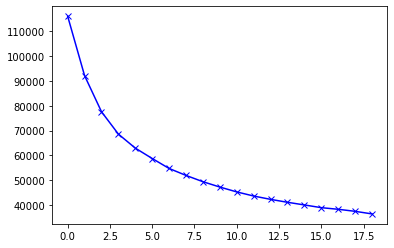

In [36]:
#optimal no. of clusters
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_principal)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-')

Comparing silhoutte scores for different no. of clusters

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_scores = []

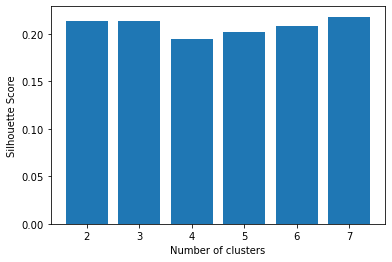

In [39]:
for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(data_after_pca_transformation))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

# Applying K-Means with no. of clusters as 3 because it has maximum silhoutte score

In [41]:
db_default = KMeans(n_clusters=7, init='k-means++').fit(X_principal) 
labels = db_default.labels_

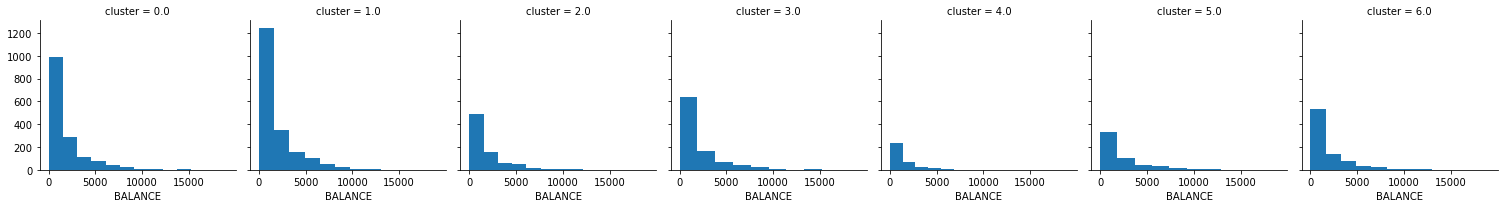

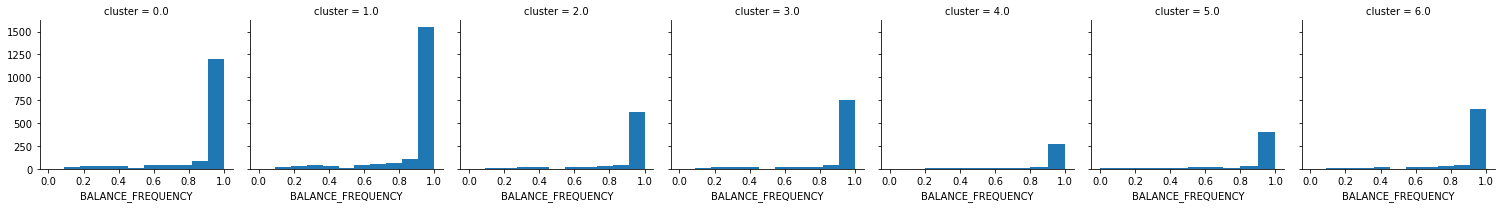

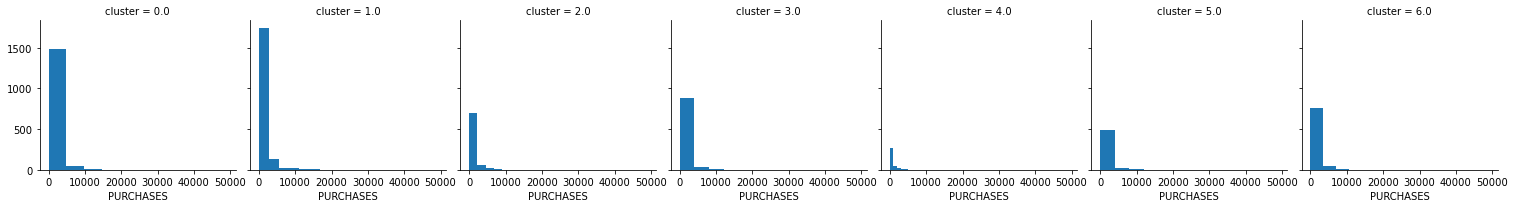

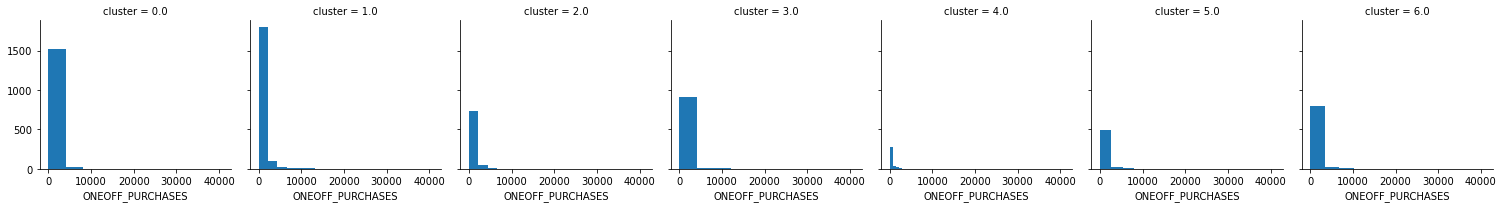

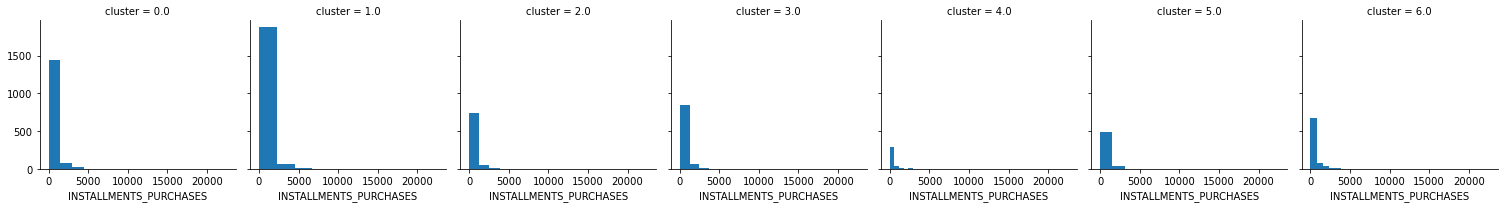

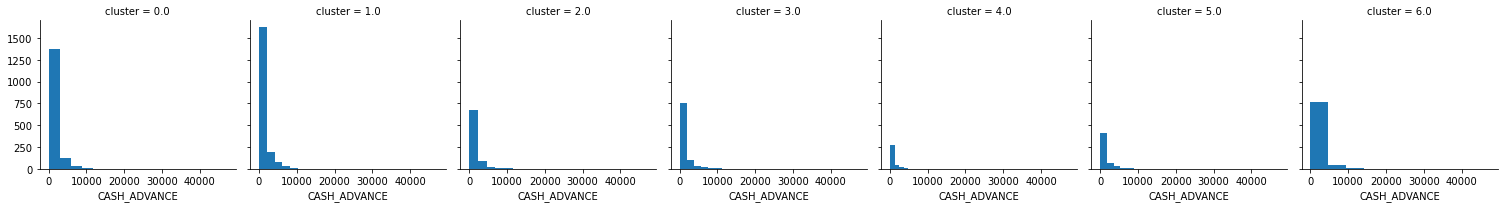

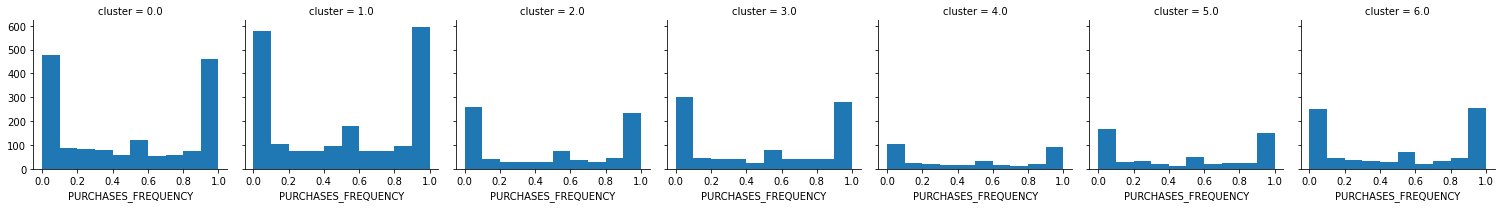

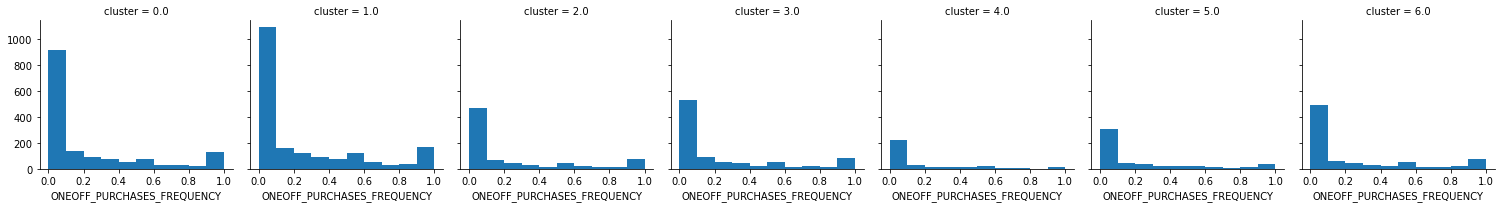

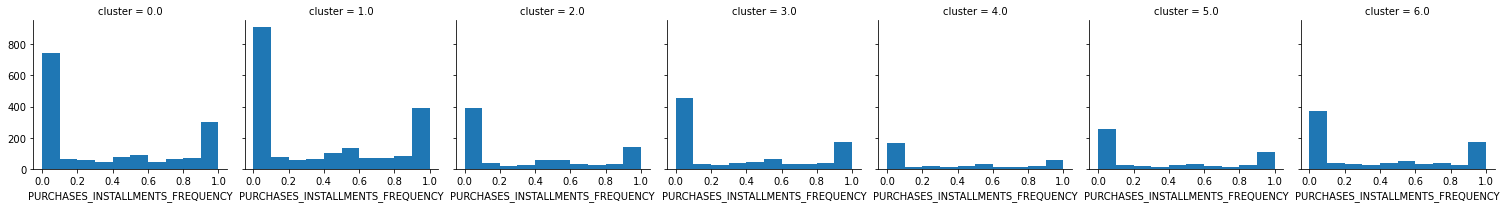

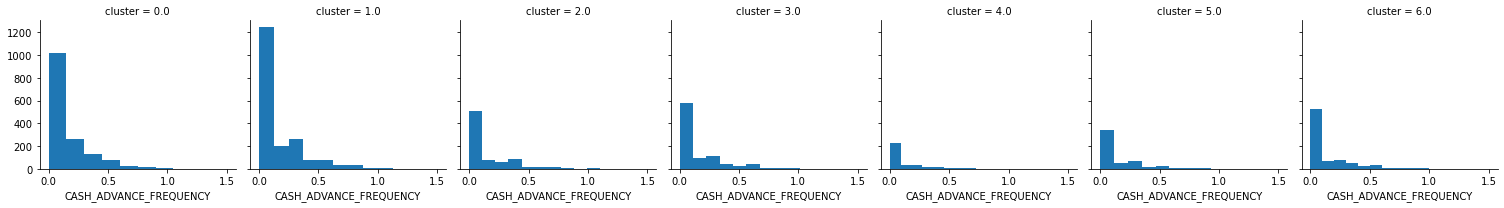

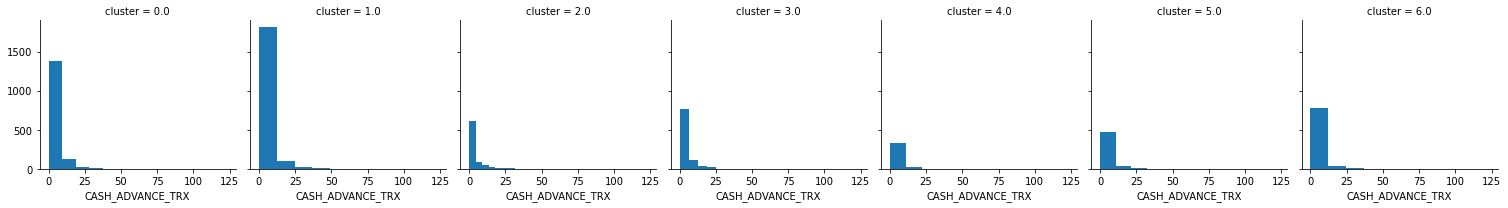

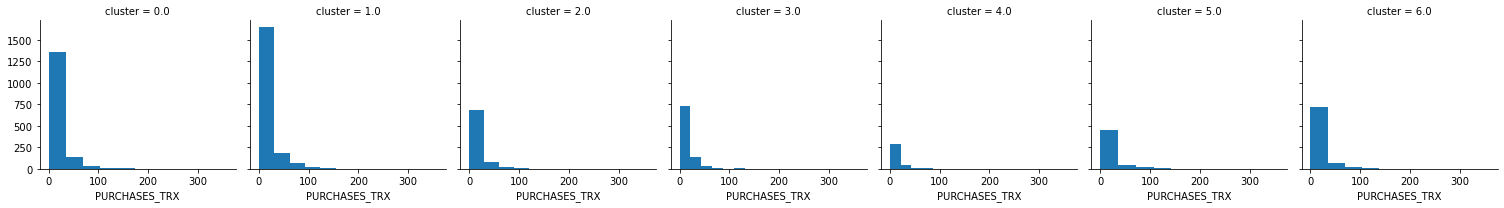

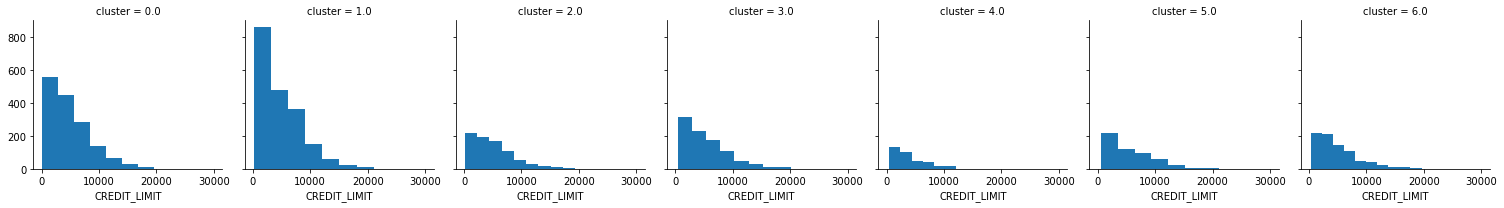

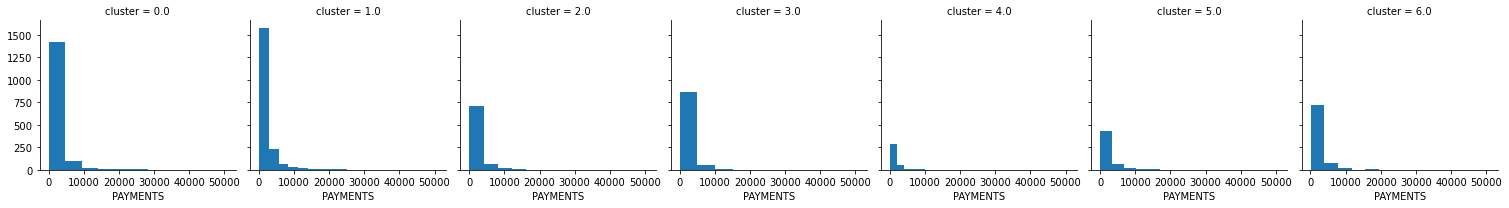

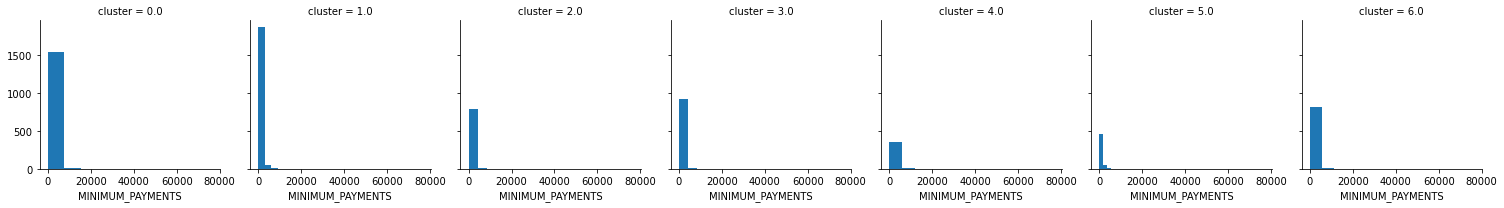

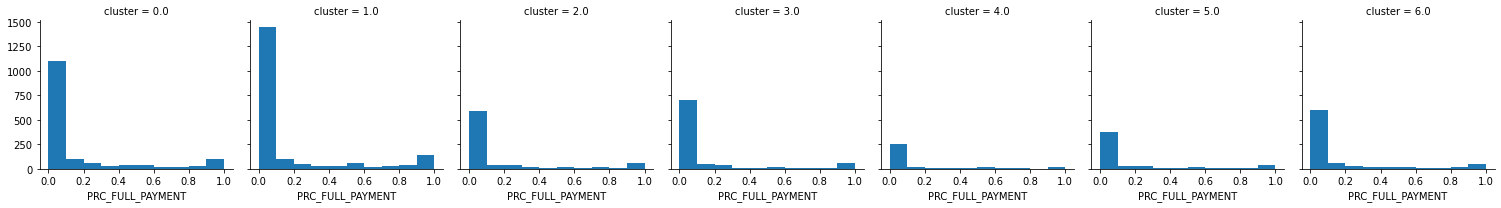

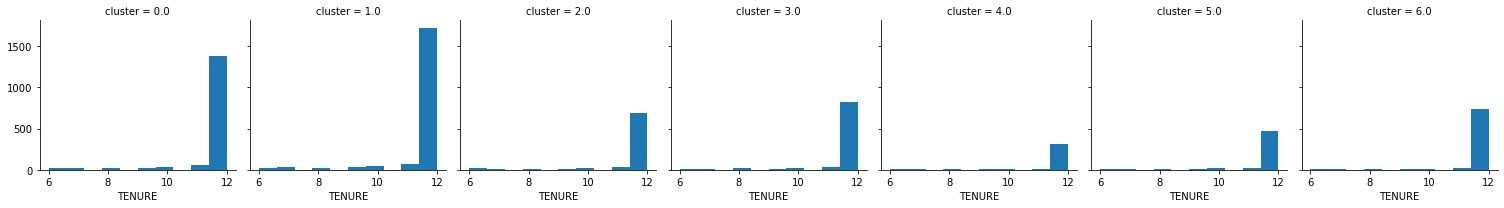

In [46]:
clusters=pd.concat([cc, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in data_without_outlier:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)

# Cluster analysis

Cluster 0 : Customers with more usage of credit card and makes more frequent purchases of product.

Cluster 1 : Customers with least usage of credit card.

Cluster 2 : Customers with moderate usage of credit card.

# Part II: Deep Learning

In [60]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM , Embedding
from tensorflow.keras.optimizers import Adam
from keras.layers import Bidirectional
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

In [48]:
senti = pd.read_csv(r"C:\Users\Kalpesh\Downloads\164423199600560ec2379f8793842aa5b168a_\25 Machine Learning Question Paper 2 with datasets\25 Machine Learning Question Paper 2 with datasets\Sentiment.csv")

In [49]:
senti.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [50]:
# Keeping only the neccessary columns

senti = senti[['sentiment','text']]

In [51]:
senti.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


<AxesSubplot:>

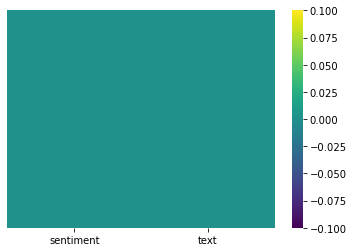

In [81]:
# Checking visually for missing values
sns.heatmap(senti.isnull(),yticklabels=False,cmap="viridis")

In [82]:
# Rechecking for missing values
for i in senti.columns:
 print(i,'=',senti[i].isnull().sum(),senti[i].dtype)

sentiment = 0 object
text = 0 object


In [84]:
p_count = 0
n_count = 0
for i in senti["sentiment"]:
    if i == "Positive":
        p_count += 1
    elif i == "Negative":
        n_count += 1
print("Positive count : ", p_count)
print("Negative count : ", n_count)
print("Total positive and negative count : ", p_count + n_count)

Positive count :  2236
Negative count :  8493
Total positive and negative count :  10729


# So we have total Number of Positive Sentiment is 2236
# and total number of negative sentiment is 8493

In [73]:
senti.text = senti.text.str.lower()

In [86]:
df_t = senti

In [87]:
def remove_tags(string):
 removelist = ""
 result = re.sub('RT','',string) # Remove RT from text 
 result = result.lower()
 return result
df_t['text'] = df_t['text'].apply(lambda cw : remove_tags(cw))

In [96]:
import nltk
from nltk.corpus import stopwords

In [93]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df_t['text'] = df_t['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [98]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kalpesh\AppData\Roaming\nltk_data...


True

In [100]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kalpesh\AppData\Roaming\nltk_data...


True

In [101]:
# Lemmatizing text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df_t['text'] = df_t.text.apply(lemmatize_text)
df_t.sample(15)

,sentiment,text
423,Negative,rt pattonoswalt going ask lenny kravitzs penis...
11621,Negative,rt rwsurfergirl candidate dont attack realdona...
11722,Negative,rt rwsurfergirl doesnt chris wallace ask polit...
13636,Negative,know [hillary clinton] come making ad sample g...
11918,Positive,rt ericstonestreet trump cam hand gopdebates
9255,Positive,rt donniewahlberg enjoyed gopdebates looking f...
2160,Negative,pouty face donald bully around gop debate im r...
4416,Negative,rand paul bc america need isolationist preside...
7605,Negative,watching snippet gopdebate thinking damn ameri...
5888,Positive,trump got double speaking time paul httptco2wn...


In [103]:
from sklearn.preprocessing import LabelEncoder

In [110]:
from keras.utils import pad_sequences
import keras

In [104]:
# Encoding Labels
reviews = df_t["text"].values
labels = df_t["sentiment"].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
senti_train , senti_test = train_test_split(senti, test_size=.2)

In [77]:
senti_train_x = senti_train.iloc[: , 1]
senti_train_y = senti_train.iloc[: , 0]

In [78]:
senti_test_x = senti_test.iloc[: , 1]
senti_test_y = senti_test.iloc[: , 0]

In [108]:
vocab_size = 3000
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(senti_train_x)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(senti_train_x)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
test_sequences = tokenizer.texts_to_sequences(senti_test_x)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [111]:
# Model Building
model = keras.Sequential([
 keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
 keras.layers.Bidirectional(keras.layers.LSTM(64)),
 keras.layers.Dense(24, activation='relu'),
 keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [115]:
num_epochs = 5
history = model.fit(train_padded, senti_train_y, epochs = num_epochs, verbose = 1, validation_split = 0.1)

Epoch 1/5


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\Kalpesh\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Kalpesh\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Kalpesh\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Kalpesh\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Kalpesh\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Kalpesh\AppData\Local\Temp\ipykernel_45736\3375791381.py", line 2, in <cell line: 2>
      history = model.fit(train_padded, senti_train_y,
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Kalpesh\anaconda3\lib\site-packages\keras\losses.py", line 2151, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_5801]

In [ ]:
prediction = model.predict(test_padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))


# Q3. Based on the model, check the sentiment for the following two sentences

In [122]:
sentence = ["He is a great leader.", "He is a terrible leader."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []

for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 54ms/step
He is a great leader.
Predicted sentiment :  Negative
He is a terrible leader.
Predicted sentiment :  Negative
